<img src="https://vip.arizona.edu/images/logoviplab.png"/>

# <center> <font color='blue'>BE-BAT 485/585 -  Lab-8 </font> </center>
# <center> <font color='green'>EX-1</font> </center>
In this exercise we will learn and work with data calibration and correction
1. Read a BSQ Landasat file (uncalibrated DN data) 
2. Convert DN to irradiance and correct surface reflectance
3. Save corrected bands as BSQ file

## The usual : Load packages needed by the exercise

In [102]:
import os
import matplotlib.pyplot as plt
import numpy as np
import math
import viplab_lib3 as vip

In [103]:
# Starts main program
#Load dataset: LANDSAT 8/OLI Image for Tucson (Date: 01/06/2020)    
filename="./Data/LANDSAT8.A2020006.DN.Tucson.bsq"
nrows=1660
ncols=2240
nbands=7
datatype=np.int16


### List of Bands and their order
#### 0: <font color="cyan">B1 (UltraBlue)</font>
#### 1: <font color="blue">B2 (Blue)</font>
#### 2: <font color="green">B3 (Green)</font>
#### 3: <font color="red">B4 (Red)</font>
#### 4: <font color="balck">B5 (NIR)</font>
#### 5: <font color="magenta">B6 (SWIR1)</font>
#### 6: <font color="magenta">B7 (MIR)</font>

In [104]:
# Read all bands into a single NumPy DataCube
print("Reading BSQ ",filename)
bandRED=vip.BSQ_band_read(filename,3,nrows,ncols)
bandNIR=vip.BSQ_band_read(filename,4,nrows,ncols)  
bandBLUE=vip.BSQ_band_read(filename,1,nrows,ncols)  
bandGREEN=vip.BSQ_band_read(filename,2,nrows,ncols)  
print("Done Reading ",filename)
# Read the other bands (BLUE and GREEN)

Reading BSQ  ./Data/LANDSAT8.A2020006.DN.Tucson.bsq
Done Reading  ./Data/LANDSAT8.A2020006.DN.Tucson.bsq


### Calibration and Correction 
#### compute corrections then apply to this LANDSAT scene

In [105]:
# display a pixel to track the correction
print("Displaying calculation for pixel row=20, col=20 RED band only ...")
pixel=bandRED[20,20]
print("DN Red pixel=",pixel)
pixel=bandNIR[20,20]
print("DN NIR pixel=",pixel)


Displaying calculation for pixel row=20, col=20 RED band only ...
DN Red pixel= 8633
DN NIR pixel= 11181


In [106]:
#Compute TOA Radiance
# L = DN * gain + offset
# get gain and offset from metadata file (Radiance)
# RED (B4): 
gain=1.0334E-02
offset=-51.67037
bandRED_RAD = bandRED * gain + offset

# NIR (B5):
gain=6.3239E-03
offset=-31.61969
bandNIR_RAD = bandNIR * gain + offset

#display radiance pixel
pixel=bandRED_RAD[20,20]
print("TOA Red Radiance pixel=",pixel)

#display radiance pixel
pixel=bandNIR_RAD[20,20]
print("TOA NIR Radiance pixel=",pixel)


TOA Red Radiance pixel= 37.543051999999996
TOA NIR Radiance pixel= 39.08783590000001


### Compute  Reflectance TOA (gain and offset are the same for all bands)

In [107]:
gain=2.00E-05
offset=-0.1
bandRED_REF= bandRED * gain + offset
bandNIR_REF= bandNIR * gain + offset

In [108]:
#display TOA reflectance pixel
pixel=bandRED_REF[20,20]
print("TOA Reflectance pixel=",pixel)


#Compute TOA Reflectance adjusted by sun angle
# local sun elevation angle
sun_elevation=31.39954892

#get local zenith angle
zenith_angle=90 - sun_elevation

bandRED_REFSUN= bandRED_REF / math.cos(math.radians(zenith_angle)) 
bandNIR_REFSUN= bandNIR_REF / math.cos(math.radians(zenith_angle)) 


#display TOA Reflectance corrected by sun angle
pixel=bandRED_REFSUN[20,20]
print("TOA Ref corrected pixel=",pixel)

TOA Reflectance pixel= 0.07266
TOA Ref corrected pixel= 0.1394617924998227


### <font color="red">TO DO</font> :  Add code here to correct the other bands 

In [109]:
### Code goes here 

## Calibrate then correct all the bands and display the images 
### The images that will show up will not show all bands unless you finish calibrating and correcting all of them (see above)

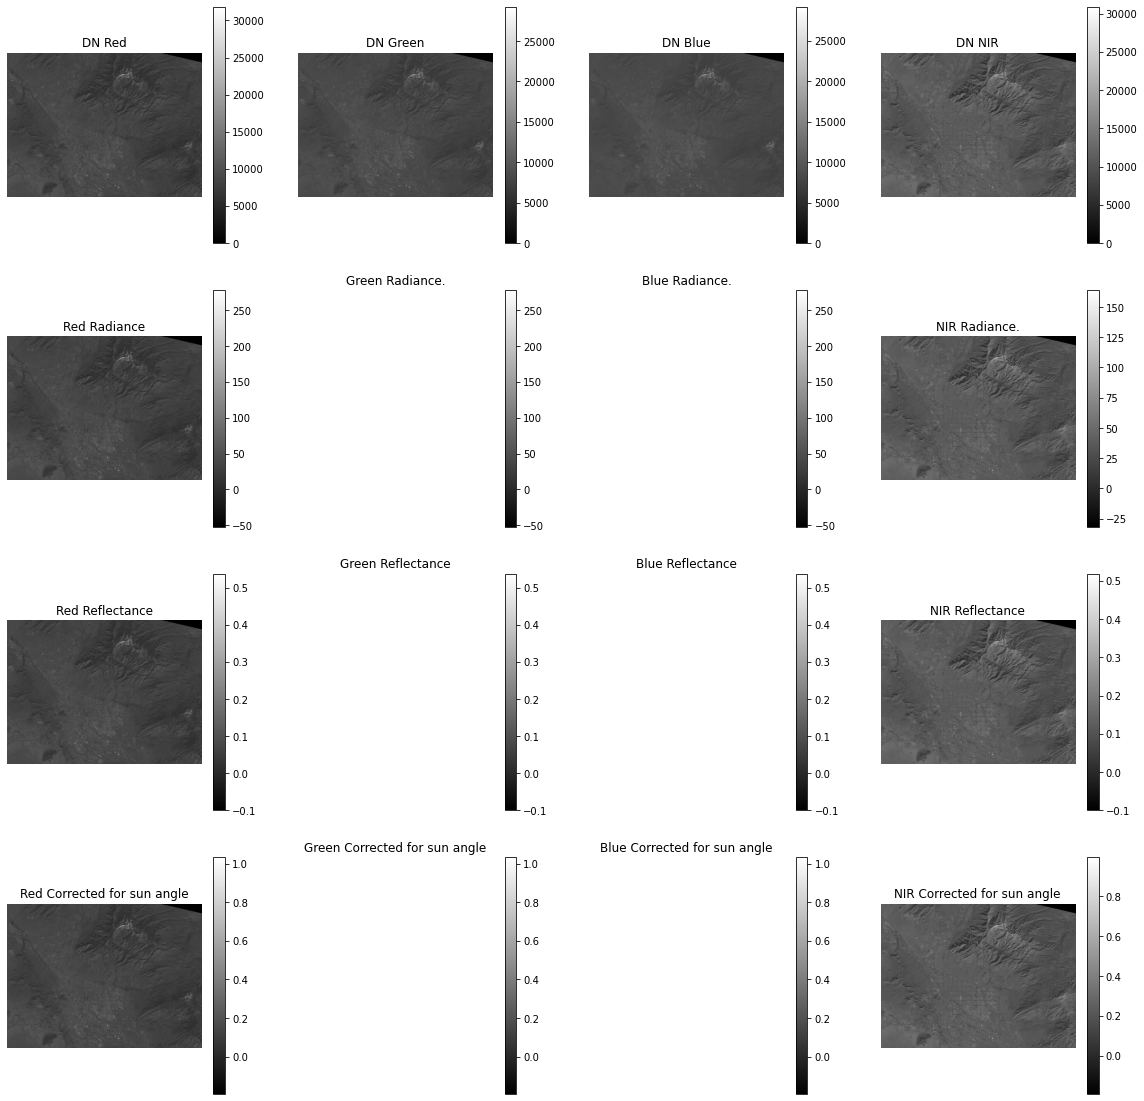

In [110]:
#plt.figure(1, figsize=(20,20))

f, plot = plt.subplots(4, 4,figsize=(20,20))

#plot original input bands
im=plot[0,0].imshow(bandRED, cmap='gray')
plot[0,0].set_title("DN Red")
plot[0,0].axis('off')
f.colorbar(im,ax=plot[0,0])
#plot[0,0].colorbar()


im=plot[0,1].imshow(bandGREEN, cmap='gray')
plot[0,1].set_title("DN Green")
plot[0,1].axis('off')
f.colorbar(im,ax=plot[0,1])

im=plot[0,2].imshow(bandBLUE, cmap='gray')
plot[0,2].set_title("DN Blue")
plot[0,2].axis('off')
f.colorbar(im,ax=plot[0,2])

im=plot[0,3].imshow(bandNIR, cmap='gray')
plot[0,3].set_title("DN NIR")
plot[0,3].axis('off')
f.colorbar(im,ax=plot[0,3])

#TOA radiance
im=plot[1,0].imshow(bandRED_RAD, cmap='gray')
plot[1,0].set_title("Red Radiance")
plot[1,0].axis('off')
f.colorbar(im,ax=plot[1,0])

#im=plot[1,1].imshow(bandGREEN_RAD, cmap='gray')
plot[1,1].set_title("Green Radiance.")
plot[1,1].axis('off')
f.colorbar(im,ax=plot[1,1])

#im=plot[1,2].imshow(bandBLUE_RAD, cmap='gray')
plot[1,2].set_title("Blue Radiance.")
plot[1,2].axis('off')
f.colorbar(im,ax=plot[1,2])

im=plot[1,3].imshow(bandNIR_RAD, cmap='gray')
plot[1,3].set_title("NIR Radiance.")
plot[1,3].axis('off')
f.colorbar(im,ax=plot[1,3])


#TOA ref
im=plot[2,0].imshow(bandRED_REF, cmap='gray')
plot[2,0].set_title("Red Reflectance")
plot[2,0].axis('off')
f.colorbar(im,ax=plot[2,0])

#im=plot[2,1].imshow(bandGREEN_REF, cmap='gray')
plot[2,1].set_title("Green Reflectance")
plot[2,1].axis('off')
f.colorbar(im,ax=plot[2,1])

#im=plot[2,2].imshow(bandBLUE_REF, cmap='gray')
plot[2,2].set_title("Blue Reflectance")
plot[2,2].axis('off')
f.colorbar(im,ax=plot[2,2])

im=plot[2,3].imshow(bandNIR_REF, cmap='gray')
plot[2,3].set_title("NIR Reflectance")
plot[2,3].axis('off')
f.colorbar(im,ax=plot[2,3])

#Reflectance SUN corrected
im=plot[3,0].imshow(bandRED_REFSUN, cmap='gray')
plot[3,0].set_title("Red Corrected for sun angle")
plot[3,0].axis('off')
f.colorbar(im,ax=plot[3,0])

#im=plot[3,1].imshow(bandGREEN_REFSUN, cmap='gray')
plot[3,1].set_title("Green Corrected for sun angle")
plot[3,1].axis('off')
f.colorbar(im,ax=plot[3,1])

#im=plot[3,2].imshow(bandBLUE_REFSUN, cmap='gray')
plot[3,2].set_title("Blue Corrected for sun angle")
plot[3,2].axis('off')
f.colorbar(im,ax=plot[3,2])

im=plot[3,3].imshow(bandNIR_REFSUN, cmap='gray')
plot[3,3].set_title("NIR Corrected for sun angle")
plot[3,3].axis('off')
f.colorbar(im,ax=plot[3,3])

## Show a true color image 

In [111]:
RGBImage=vip.Image_getRGB(bandRED,bandGREEN, bandBLUE,30000)

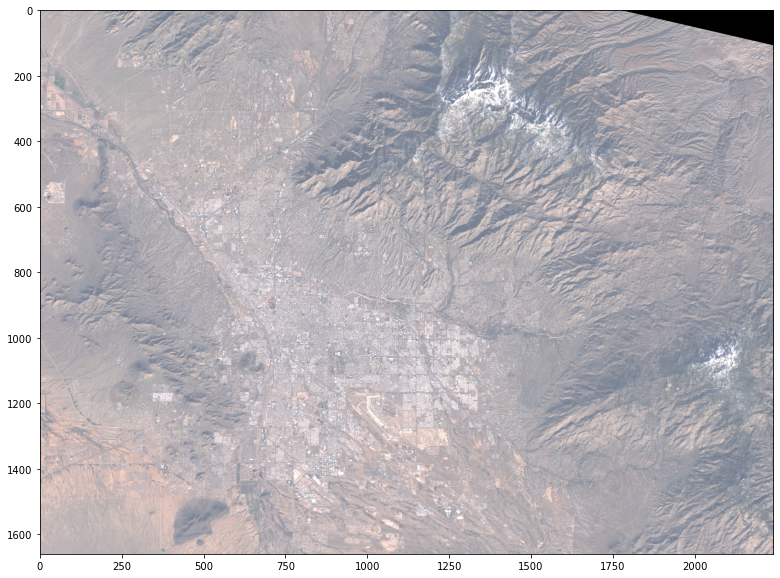

In [112]:
fig= plt.figure(figsize=(15,10))
plt.imshow(RGBImage)

## Now extract and compare spectral signatures for pixels 

In [113]:
# Set pixel location 
r=1200
c=1500

# Set Band/wavelength center value for plotting purposes
waveBlue=470
waveGreen=560
waveRed=660
waveNIR=870

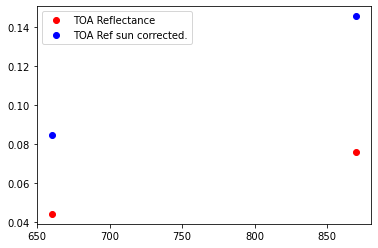

In [114]:
# Define X-Axis 
x=[ waveRed, waveNIR]

# Extarct the pixel signature 
#TOA Reflectance
pixelRed=bandRED_REF[r,c]
pixelNIR=bandNIR_REF[r,c]

# The Y-Axis values 
y=[pixelRed, pixelNIR]



#TOA Ref Sun corrected
pixelRed=bandRED_REFSUN[r,c]
pixelNIR=bandNIR_REFSUN[r,c]

y2=[ pixelRed, pixelNIR]

plt.figure(3)
line1=plt.plot(x,y,'ro',label='TOA Reflectance')
line2=plt.plot(x,y2,'bo', label='TOA Ref sun corrected.')
#plt.legend(handles=[line1, line2])
plt.legend()
plt.show()

# Create NumPy Arrays for corrected data and store them

In [115]:
#save corrected band to BSQ file

# rescale pixel values by 10000 to transform from float to integers
bandRED_REFSUN = bandRED_REFSUN * 10000
bandNIR_REFSUN = bandNIR_REFSUN * 10000

# Create a BSQ file
MyBSQ=vip.BSQWriter(nrows,ncols)
MyBSQ.Open_toSave("LANDSAT08.A2019051.CORRECTED.bsq")
MyBSQ.Save_Band(bandRED_REFSUN.astype(np.int16),"RED")
MyBSQ.Save_Band(bandNIR_REFSUN.astype(np.int16),"NIR")
# save the rest of the bands

#close file
MyBSQ.Close_File()

saving  RED
saving  NIR


# <font color="red">TO DO </font>
### The work above shows calibration/correction for 2 bands  Red + NIR
### Complete the calibration for other bands
### Create images of all bands after each processing stage
#### Create true color images after each processing stage
#### Extract spectral signatures for two or more features from all stages
#### Label the images properly (like we did before)
#### Extract a transect (a line in any direction) from each stage and plot them on the same graph for each band separately

In [116]:
## Your code needs to be applied above